<a href="https://colab.research.google.com/github/Domaakshithareddy/stock-market-analysis/blob/main/stock_market_project_eduskils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Column names: Index(['MSFT', 'IBM', 'SBUX', 'AAPL', 'GSPC', 'Date'], dtype='object')
Feature columns: ['MSFT']
Target column: GSPC
Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 15, 'bootstrap': True}

Comparison Table:
  Metrics  Random Forest  Linear Regression
0     MAE      75.581779         112.972826
1     MSE   10534.151408       19318.881179
2    RMSE     102.636014         138.992378
3      R2       0.920488           0.854180
Random Forest Accuracy: 0.92
Linear Regression Accuracy: 0.85


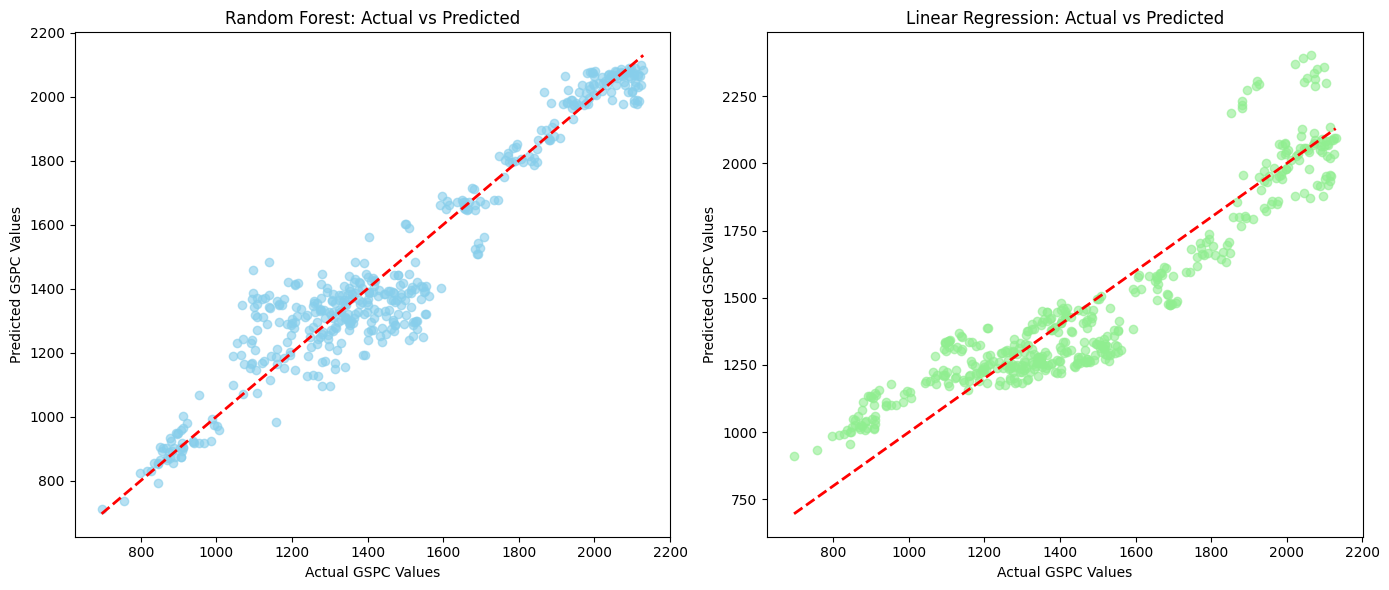

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from CSV
df = pd.read_csv("stockdata.csv")
print("Column names:", df.columns)


if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


feature_columns = [col for col in df.columns if 'MSFT' in col]
target_column = 'GSPC'
print("Feature columns:", feature_columns)
print("Target column:", target_column)

X = df[feature_columns]
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
lr_model = LinearRegression()

param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)
random_search_rf.fit(X_train, y_train)

best_rf_model = random_search_rf.best_estimator_

lr_model.fit(X_train, y_train)

rf_predictions = best_rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

def evaluate_model(y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

# Evaluation metrics for Random Forest and Linear Regression
rf_metrics = evaluate_model(y_test, rf_predictions)
lr_metrics = evaluate_model(y_test, lr_predictions)

# Comparison table
comparison_df = pd.DataFrame({
    "Metrics": ["MAE", "MSE", "RMSE", "R2"],
    "Random Forest": [rf_metrics["MAE"], rf_metrics["MSE"], rf_metrics["RMSE"], rf_metrics["R2"]],
    "Linear Regression": [lr_metrics["MAE"], lr_metrics["MSE"], lr_metrics["RMSE"], lr_metrics["R2"]]
})

best_rf_params = random_search_rf.best_params_
print("Best Random Forest Parameters:", best_rf_params)
print("\nComparison Table:")
print(comparison_df)

# Accuracy scores
rf_accuracy = best_rf_model.score(X_test, y_test)
lr_accuracy = lr_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Linear Regression Accuracy: {lr_accuracy:.2f}")

plt.figure(figsize=(14, 6))

# Scatter plot for Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions, alpha=0.6, color="skyblue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual GSPC Values')
plt.ylabel('Predicted GSPC Values')

# Scatter plot for Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, lr_predictions, alpha=0.6, color="lightgreen")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual GSPC Values')
plt.ylabel('Predicted GSPC Values')

plt.tight_layout()
plt.show()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 1805310.5000 - mae: 1319.4949 - val_loss: 4053779.5000 - val_mae: 2012.0112
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 1795155.2500 - mae: 1314.5065 - val_loss: 4037478.5000 - val_mae: 2007.9563
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1786532.7500 - mae: 1310.6251 - val_loss: 4018522.7500 - val_mae: 2003.2305
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1754118.6250 - mae: 1299.2296 - val_loss: 3996639.0000 - val_mae: 1997.7609
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 1758044.6250 - mae: 1300.2788 - val_loss: 3971418.5000 - val_mae: 1991.4386
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1701736.7500 - mae: 1279.0367 - val_loss: 3942697.7500 - val_mae: 1984.2145
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1732668.0000 - mae: 1290.6796 - val_loss: 3910493.5000 - val_mae: 1976.0830
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - l

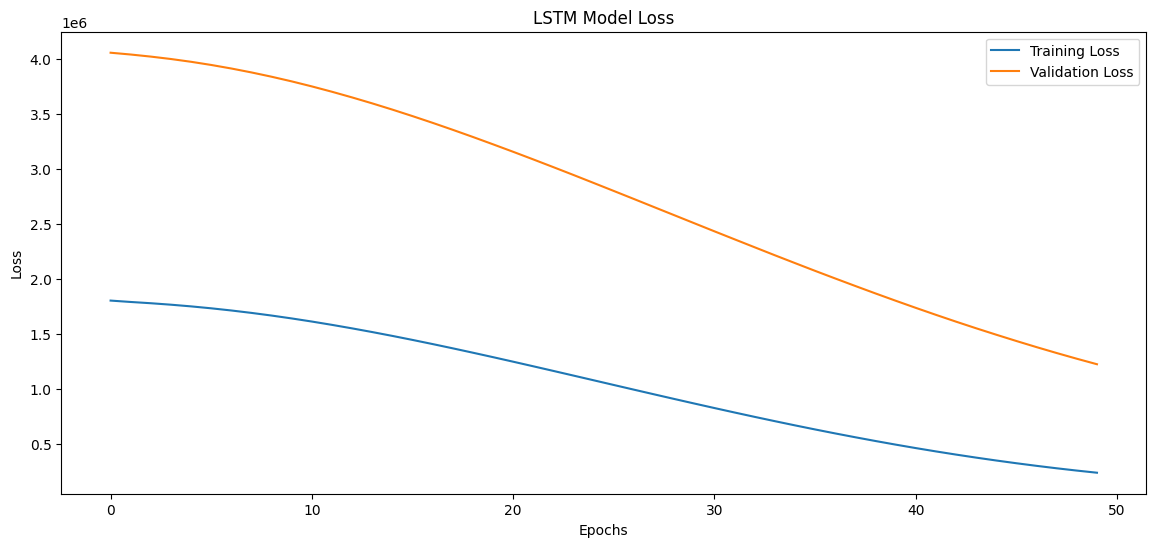

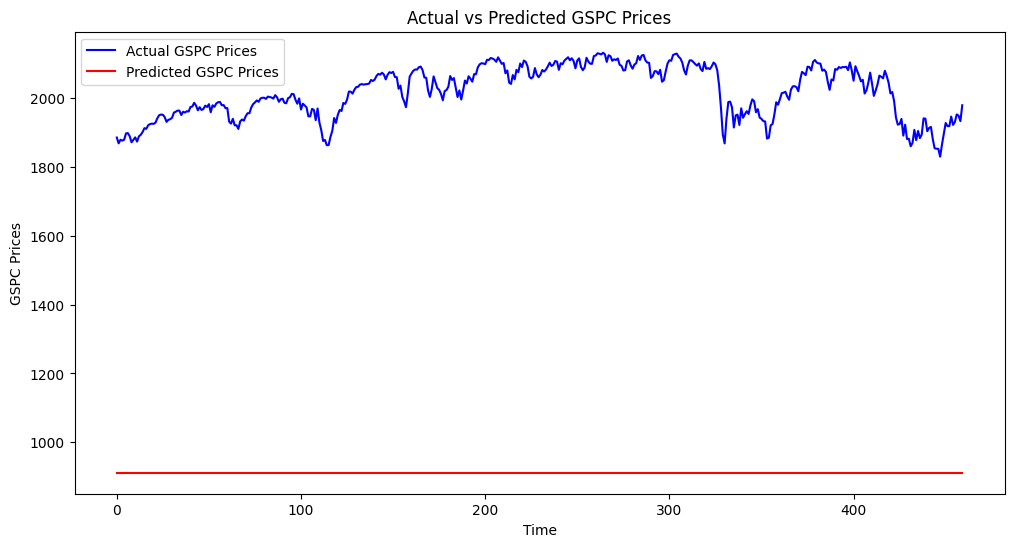

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.layers import Input

def parse_dates(df, date_column):
    date_formats = ['%d-%m-%Y', '%Y-%m-%d', '%m-%d-%Y', '%d/%m/%Y', '%Y/%m/%d']
    for fmt in date_formats:
        try:
            df[date_column] = pd.to_datetime(df[date_column], format=fmt, errors='raise')
            return df
        except (ValueError, TypeError):
            continue
    raise ValueError(f"Could not parse dates in column '{date_column}' with any of the provided formats.")

#Load the dataset from CSV
df = pd.read_csv("stockdata.csv")
if 'Date' in df.columns:
    df = parse_dates(df, 'Date')

df.dropna(subset=['Date'], inplace=True)

feature_columns = [col for col in df.columns if 'MSFT' in col]
target_column = 'GSPC'

if target_column not in df.columns:
    raise ValueError(f"{target_column} column not found in the dataset")

X = df[feature_columns]
y = df[target_column]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

timesteps = 10
X_lstm, y_lstm = [], []

for i in range(timesteps, len(X_scaled)):
    X_lstm.append(X_scaled[i-timesteps:i])
    y_lstm.append(y.iloc[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42, shuffle=False)

model = tf.keras.Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

#Predictions
lstm_predictions = model.predict(X_test)

#Model evaluation
mae = mean_absolute_error(y_test, lstm_predictions)
mse = mean_squared_error(y_test, lstm_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lstm_predictions)

print(f"LSTM Model - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2 Score: {r2:.4f}")

#Plotting the loss during training
plt.figure(figsize=(14, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Visualizing Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual GSPC Prices')
plt.plot(lstm_predictions, color='red', label='Predicted GSPC Prices')
plt.title('Actual vs Predicted GSPC Prices')
plt.xlabel('Time')
plt.ylabel('GSPC Prices')
plt.legend()
plt.show()



Choose a stock from the following list:
MSFT, IBM, SBUX, AAPL, GSPC, 
Enter the stock name: AAPL
Random Forest Accuracy for AAPL: 1.00

Predicted AAPL price after 30 days: $101.70
Expected profit for AAPL on 30th day: $1.17


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


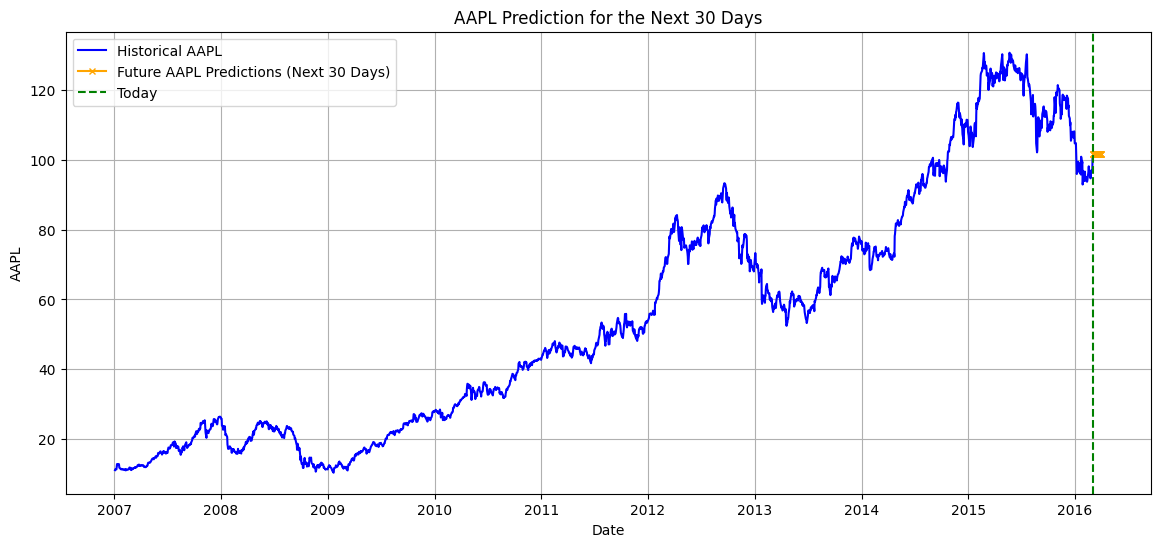

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("stockdata.csv")

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

print("Choose a stock from the following list:")
for column in df.columns:
    if column != 'Date':
        print(column, end=", ")

stock = str(input('\nEnter the stock name: '))

feature_columns = [col for col in df.columns if col != 'Date' and col != stock]
target_column = stock
scaler = StandardScaler()
X = df[feature_columns]
y = df[target_column]
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)
random_search_rf.fit(X_train, y_train)

best_rf_model = random_search_rf.best_estimator_
rf_predictions = best_rf_model.predict(X_test)
rf_accuracy = best_rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy for {stock}: {rf_accuracy:.2f}")

last_date = df['Date'].iloc[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 31)]
last_row_features = df[feature_columns].iloc[-1:].values
future_features = np.tile(last_row_features, (30, 1))
future_features_scaled = scaler.transform(future_features)
future_predictions = best_rf_model.predict(future_features_scaled)
stock_after_30days = future_predictions[-1]
print(f"\nPredicted {stock} price after 30 days: ${stock_after_30days:.2f}")

current_price = df[target_column].iloc[-1]
profit = stock_after_30days - current_price
print(f"Expected profit for {stock} on 30th day: ${profit:.2f}")

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df[target_column], label=f'Historical {stock}', color='blue')
plt.plot(future_dates, future_predictions, label=f'Future {stock} Predictions (Next 30 Days)', color='orange', marker='x', markersize=5)
plt.axvline(x=last_date, linestyle='--', color='green', label='Today')
plt.title(f'{stock} Prediction for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel(stock)
plt.legend()
plt.grid()
plt.show()